## Diabetes Risk Prediction Analysis

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Understanding of the data

In [4]:
# Printing 2 rows for sanity check to identify all the features present in the dataset.
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')
df.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive


In [5]:
# Checking the size of the dataset i.e number of rows and columns
df.shape

(520, 17)

In [6]:
# Checking for basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
# Checking for the null values in the dataset
df.isnull().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

### Conclusion:
The dataset comprises 520 observations and 17 features, with a blend of categorical and numerical data types, and is devoid of any null values, ensuring its completeness and readiness for analysis. The presence of both categorical and numerical variables necessitates a conversion of categorical data into numerical format to facilitate effective use in machine learning models and statistical analyses.

The dataset being clean and complete, the next critical step involves encoding the categorical variables, which will enable accurate and efficient model training, analysis, and subsequent insight generation.

## Data visualizations to get an insight about the dataset.

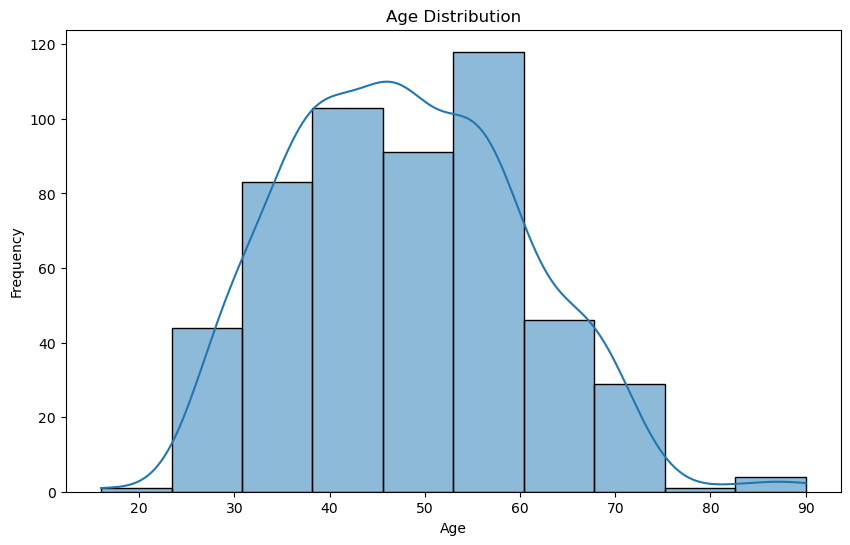

In [8]:
# Since our dataset has only AGE column as numeric, we will see the distribution of the column based on 'binning' the column into 10 bins of equal width.
df.columns = map(str.lower, df.columns)
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='gender', ylabel='count'>

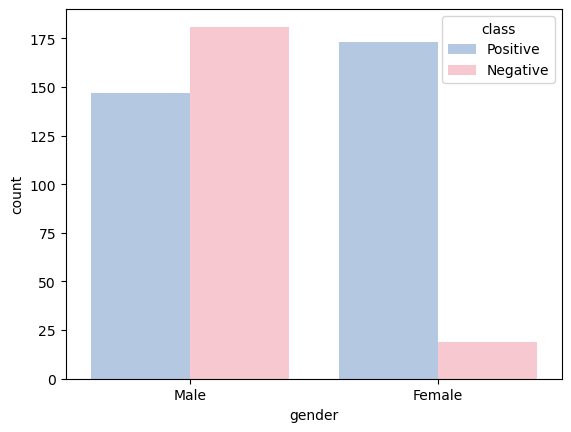

In [9]:
# Plot to see the Case with gender.
custom_palette = {'Negative': 'pink', 'Positive': '#aec7e8'}
sns.countplot(data = df, x = df['gender'], hue = df['class'], palette=custom_palette)

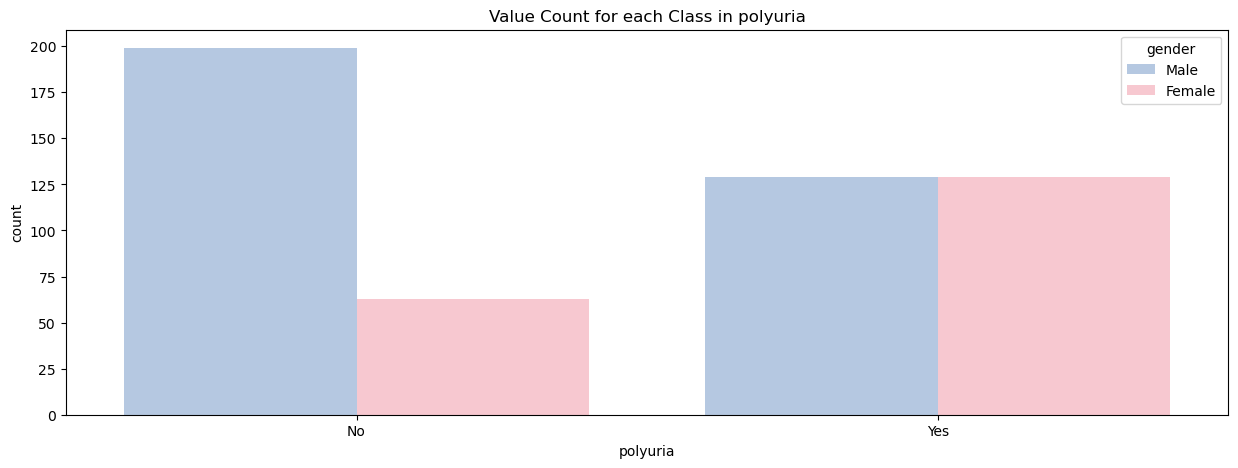

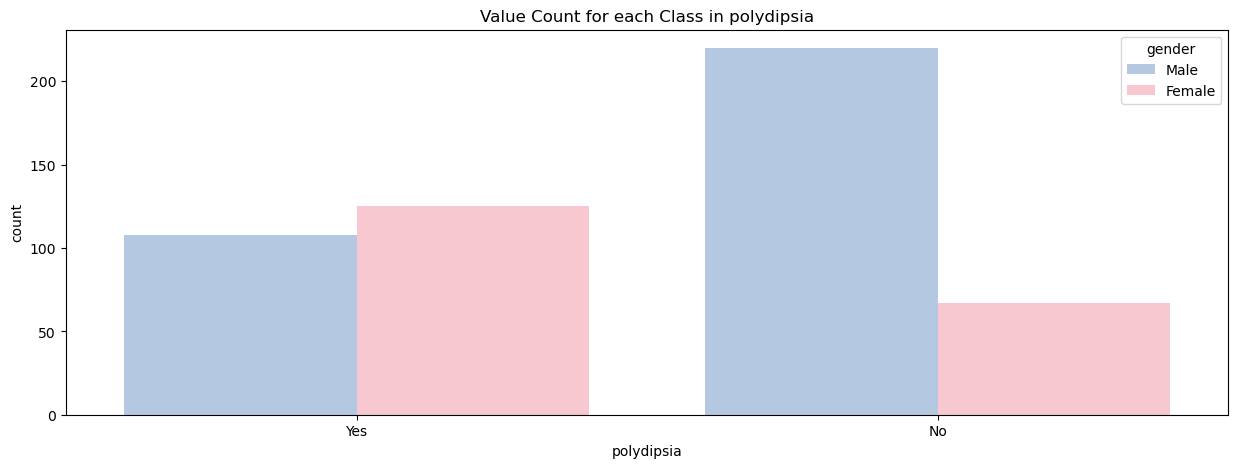

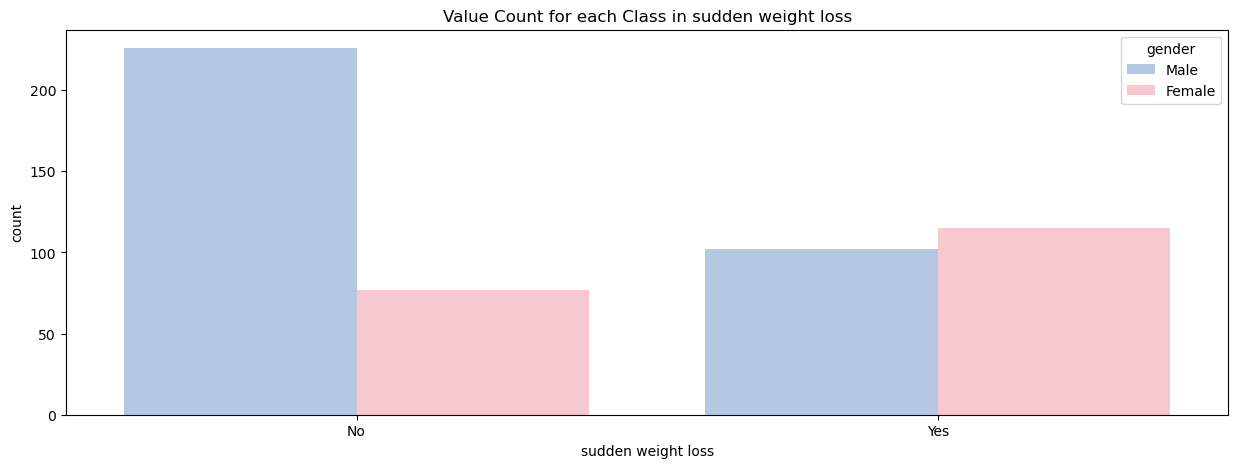

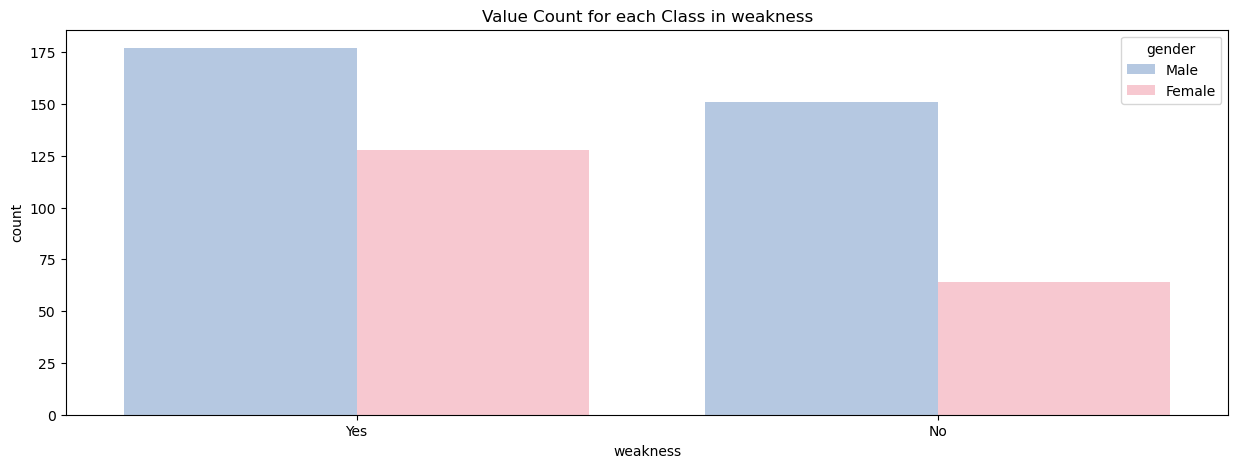

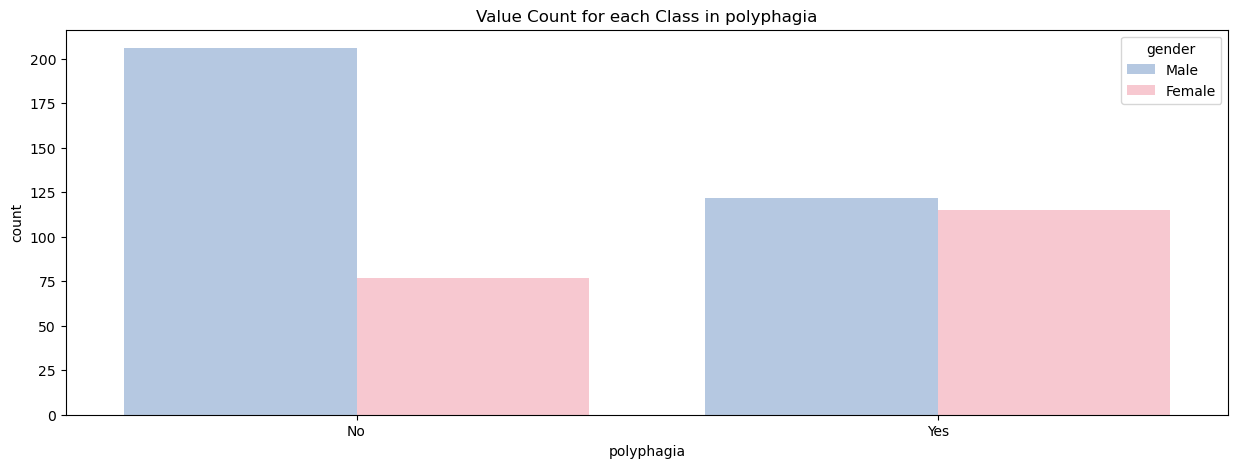

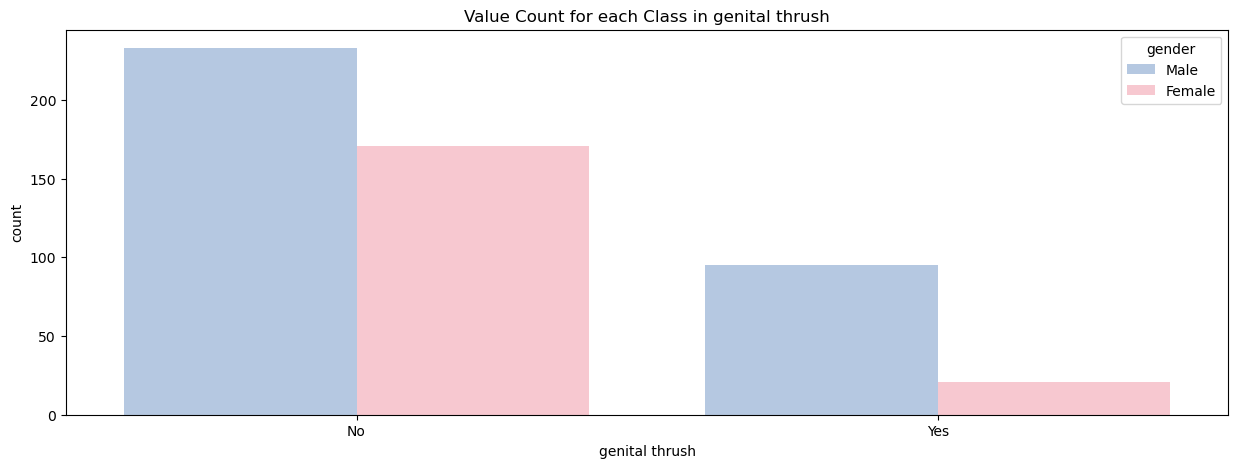

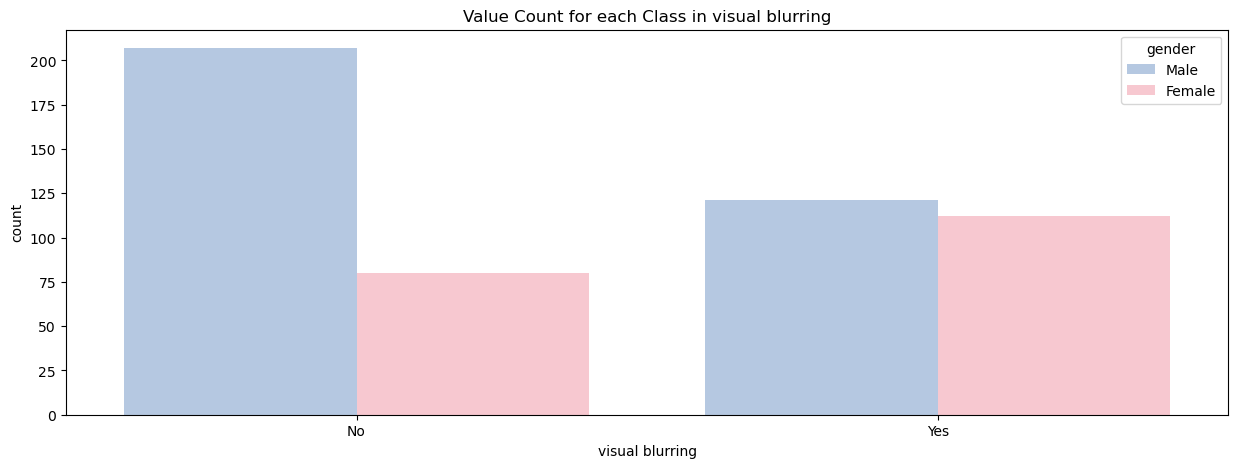

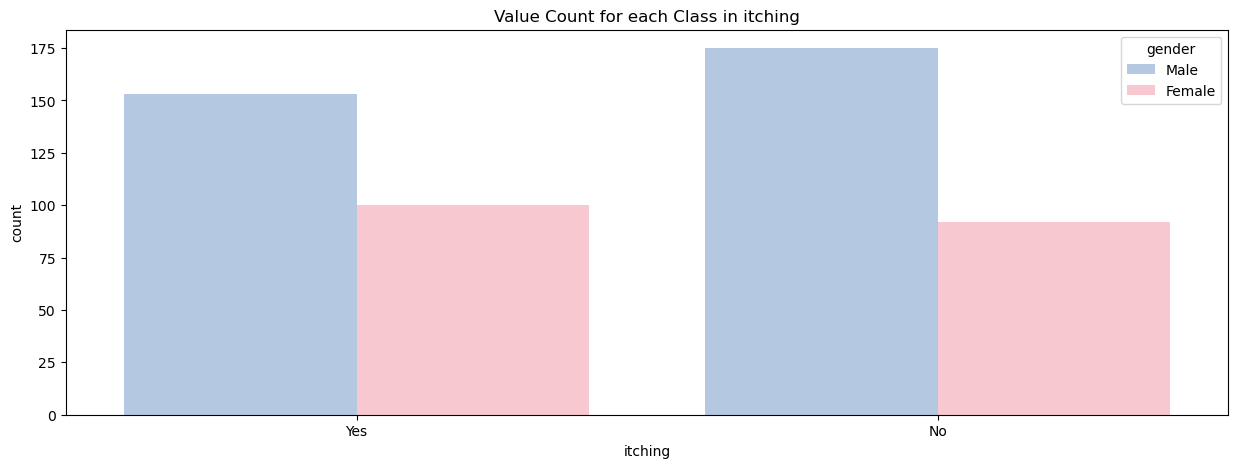

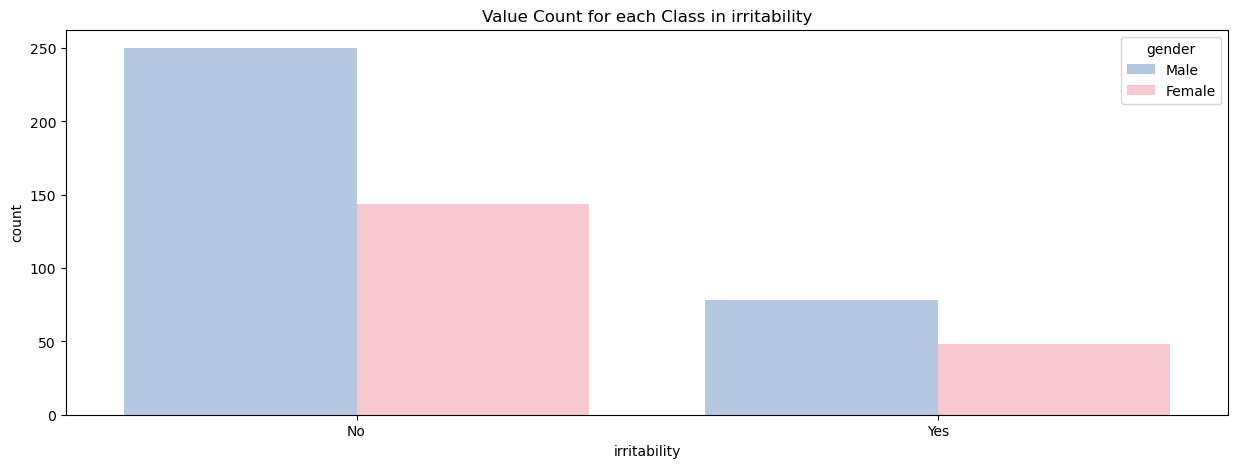

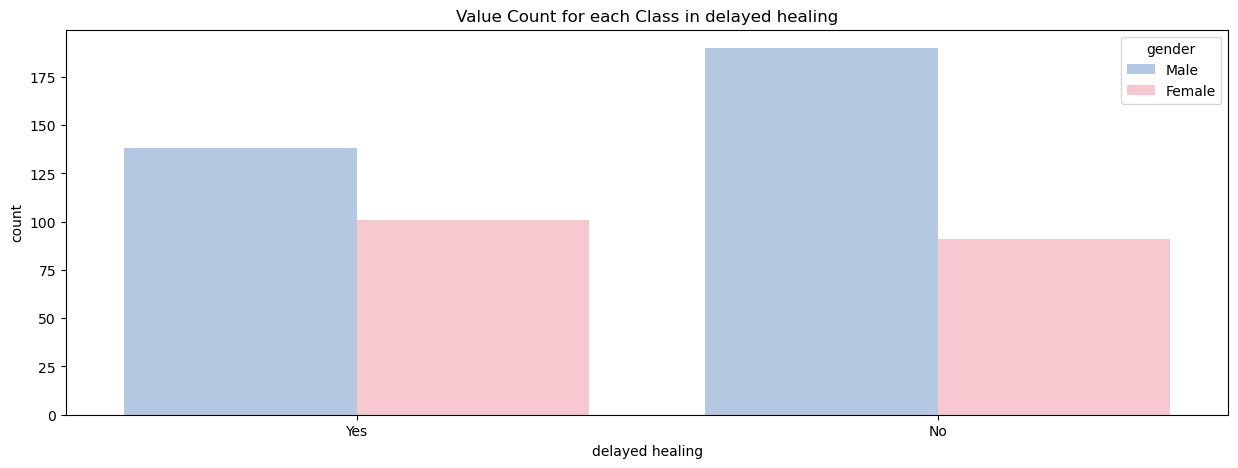

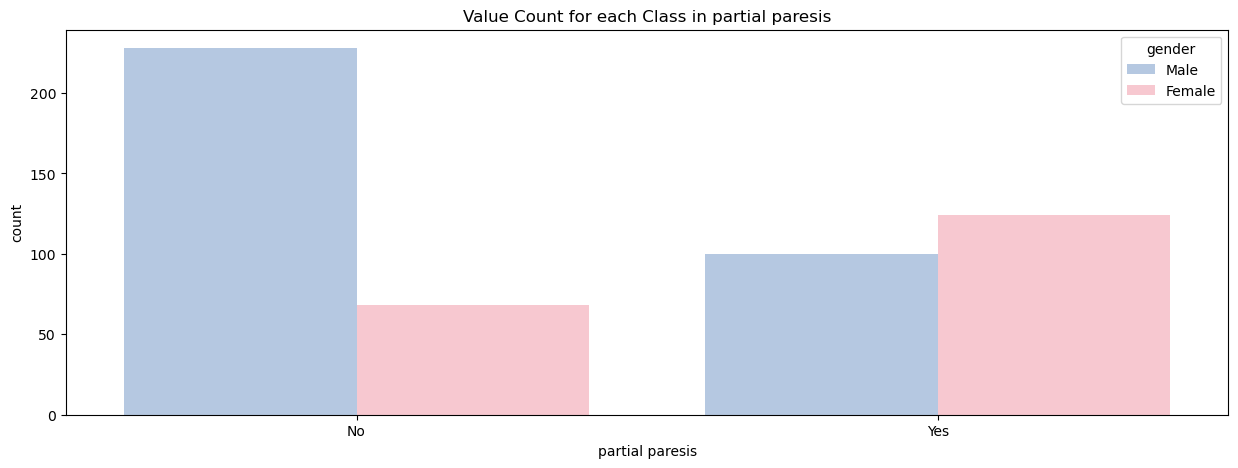

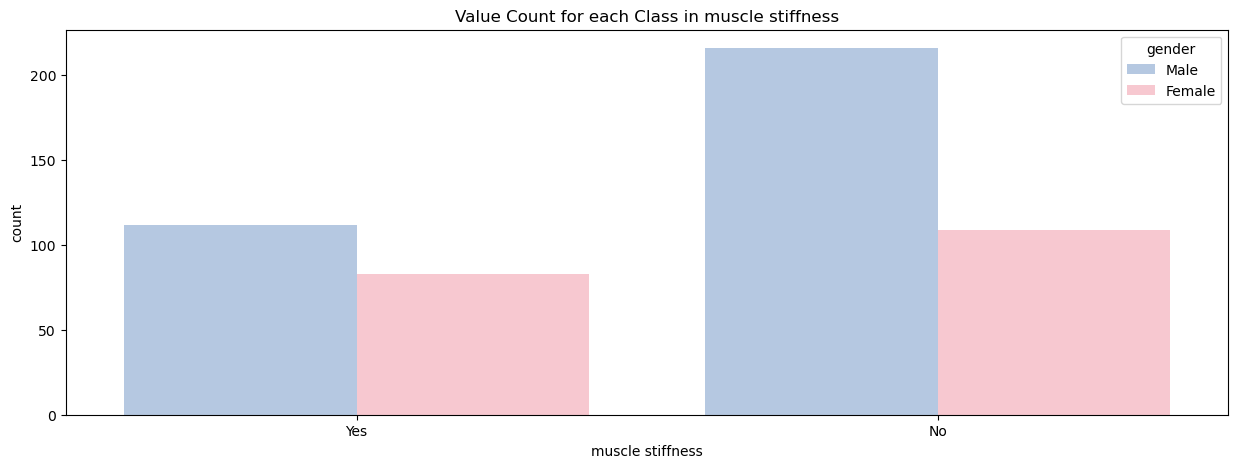

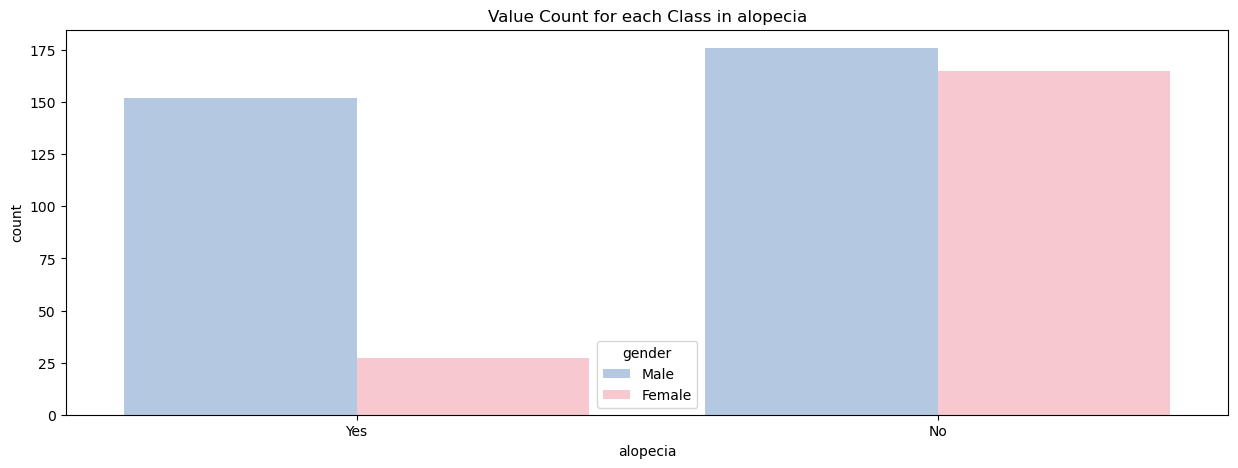

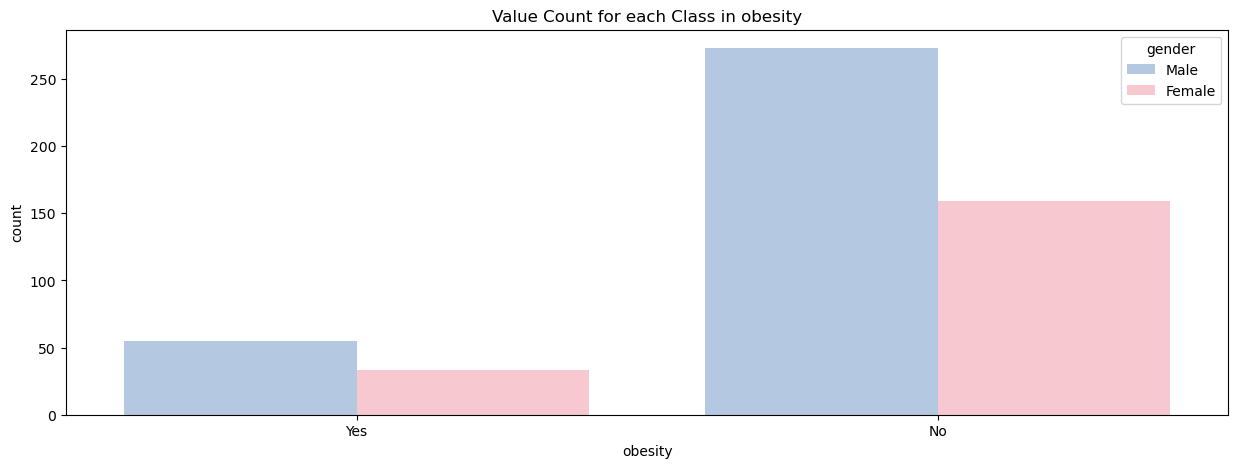

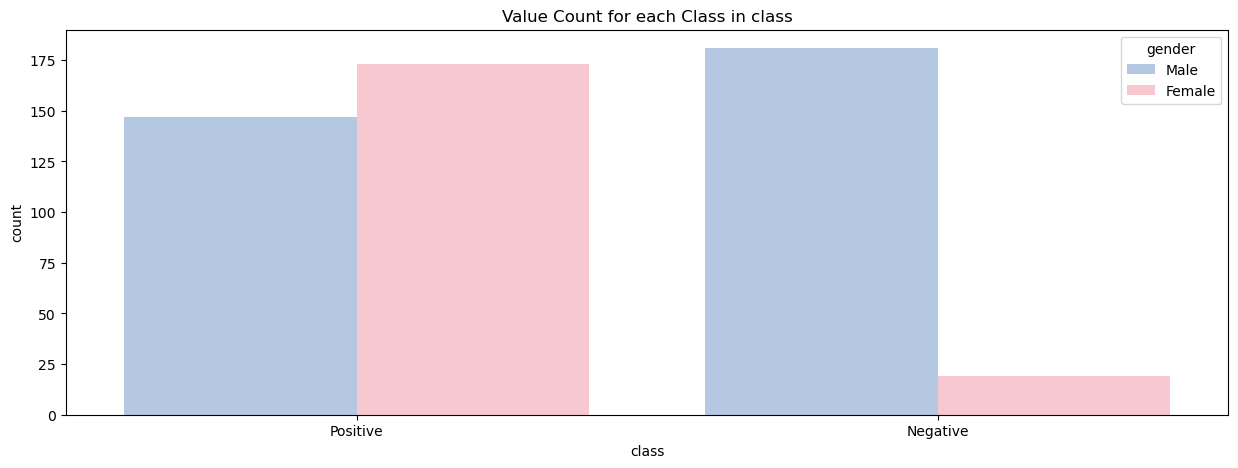

In [10]:
# Plot to see the value count for each class in the dataset.
col = df.columns.to_list()
col.pop(0)
col.pop(0)
custom_palette = {'Male': '#aec7e8', 'Female': 'pink'}
for i in col:
  plt.figure(figsize=(15,5))
  sns.countplot(x = i, data = df, hue = 'gender', palette=custom_palette)
  plt.title(f"Value Count for each Class in {i}")
  plt.show()

#### Label Encoing for correlation analysis

In [11]:
# Instantiate LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all columns except 'Age' and 'class'
for col in df.columns[1:]:
    df[col] = le.fit_transform(df[col])


In [12]:
df

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


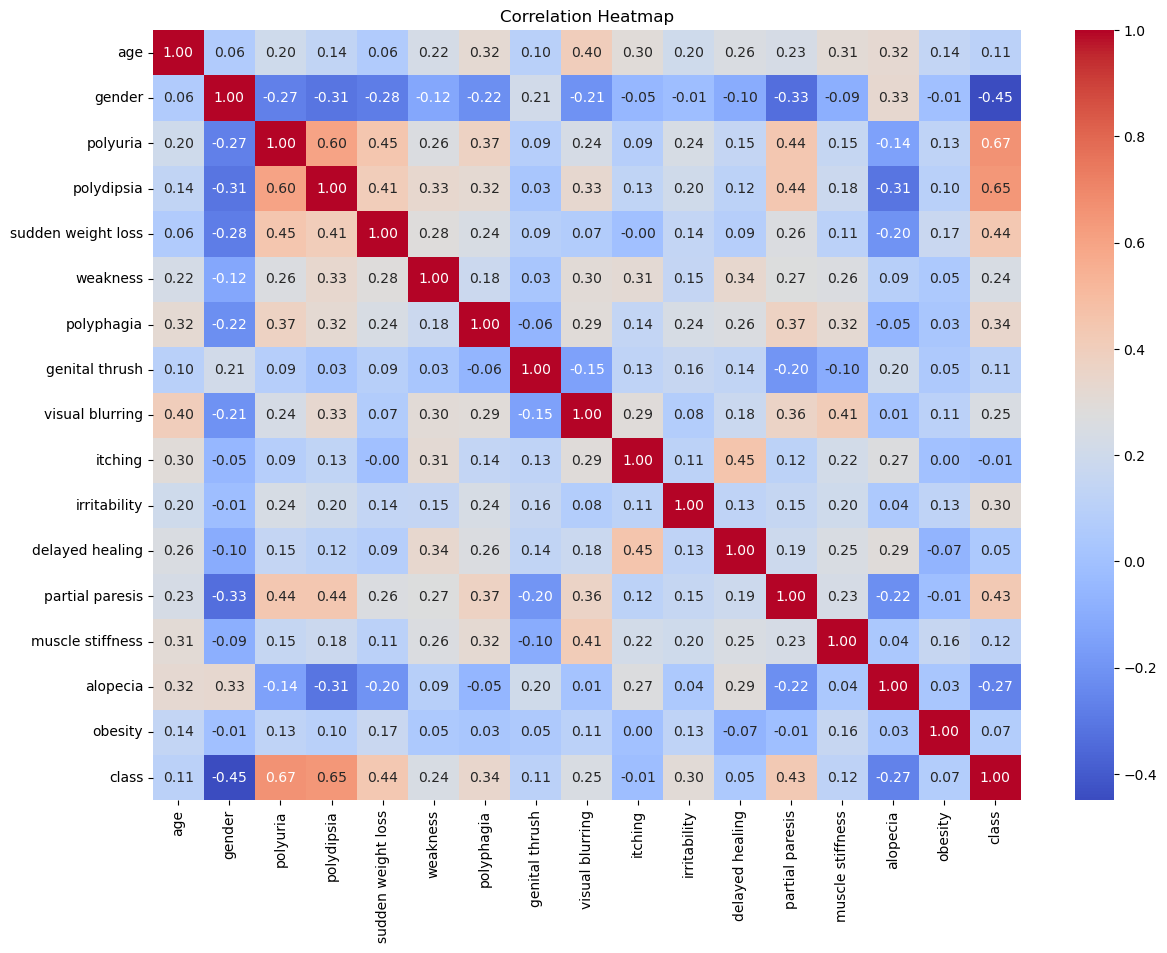

In [13]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Conclusion:

Here's a summarized explanation of the relationships between the features based on gender and the class variable (positive for diabetic, negative for non-diabetic),
based on visual analysis:

**1. Age:**
The binning of the age column into equal-width intervals of 10 years reveals a histogram with a normal distribution shape, indicating that age is evenly distributed across the specified bins. This suggests that the dataset exhibits a balanced age distribution without significant skewness or outliers in the binned data.

**2. Gender:**
Based on the gender distribution throughout the classes, there is a clear imbalance in the 'Negative' class, where there are disproportionately more males than females. The 'Positive' class, on the other hand, exhibits a more equal distribution with a higher proportion of female students than male students, indicating a possible gender-related pattern in class assignments.

**3. Polyuria:**
The analysis of polyuria by gender shows that both females and males have a higher incidence of 'Yes' (indicating the presence of polyuria), but males have a substantially greater total count of 'No' responses. This indicates that while both genders exhibit similar rates of polyuria, males are more likely to report the absence of polyuria compared to females.

**4. Polydipsia:**
The analysis of polydipsia by gender shows that males exhibit a higher total count of 'No' responses compared to females, while females have a slightly higher incidence of 'Yes' responses. This suggests that males are more likely to report not experiencing polydipsia, whereas females show a slightly higher prevalence of the condition.

**5. Sudden weight loss:**
The analysis of sudden weight loss by gender indicates that males report 'No' responses more frequently than females, while females have a higher incidence of 'Yes' responses. This suggests that males are more likely to not experience sudden weight loss, whereas females are somewhat more likely to report experiencing it.

**6. Weakness:**
The analysis of weakness by gender reveals that both males and females report 'Yes' responses at higher rates than 'No' responses, but males have a higher overall incidence of weakness compared to females. This indicates that while weakness is commonly reported among both genders, males are more frequently affected by it than females.

**7. Polyphagia:**
The analysis of polyphagia by gender shows that while both males and females report 'Yes' responses, males have a significantly higher total count of 'No' responses compared to females. This suggests that males are more likely to report not experiencing polyphagia, whereas females show a higher incidence of the condition.

**8. Genital Thrush**
The analysis of genital thrush by gender reveals that females report a much higher incidence of 'No' compared to males, while males have a significantly higher total count of 'Yes' responses. This indicates that genital thrush is more commonly reported among males, whereas a larger proportion of females report not experiencing the condition.

**9. Visual Blurring:**
the results reveal a noticeable disparity in visual blurring occurrences between genders. Females with diabetes show a higher incidence of visual blurring compared to males. This suggests that visual blurring might be a more prominent symptom in females.

**10. Itching:**
The analysis of itching symptoms in diabetes predictions indicates a gender-based difference in incidence rates. Females report 100 cases of itching, while males report 153 cases. This suggests that itching is more prevalent among males

**11. Irritability:**
The analysis of irritability by gender shows that females report a much higher incidence of 'No' compared to males, with 144 females indicating no irritability versus 250 males. Conversely, males have a higher total count of 'Yes' responses, with 78 cases, compared to 48 cases in females. This suggests that irritability is more commonly reported among males, while a larger proportion of females do not experience this symptom.

**12. Delayed Healing:**
The analysis of delayed healing by gender reveals that males report a higher incidence of 'Yes' with 138 cases compared to females who have 101 cases. Conversely, females report a higher incidence of 'No' with 91 cases versus 190 cases for males. This indicates that delayed healing is more frequently reported among males, while a larger proportion of females do not experience this symptom.

**13. Partial Paresis:**
The analysis of partial paresis by gender shows that females report a higher incidence of 'Yes,' with 124 cases compared to 100 cases in males. Conversely, males have a greater number of 'No' responses, with 228 cases versus 68 cases in females. This suggests that partial paresis is more commonly reported among females, while a larger proportion of males do not experience this symptom.

**14. Muscle Stiffness:**
The analysis of muscle stiffness by gender reveals that males report a higher incidence of 'Yes,' with 112 cases compared to 83 cases in females. Conversely, females have a higher incidence of 'No,' with 109 cases versus 216 cases in males. This indicates that muscle stiffness is more frequently reported among males, while a larger proportion of females do not experience this symptom.

**15. Alopecia:**
The analysis of alopecia by gender shows that males report a significantly higher incidence of 'Yes,' with 152 cases compared to just 27 cases in females. Conversely, females have a higher incidence of 'No,' with 165 cases versus 176 cases in males. This suggests that alopecia is more commonly reported among males, while a larger proportion of females do not experience this condition.

**16. Obesity:**
The analysis of obesity by gender reveals that males report a higher incidence of 'Yes,' with 55 cases compared to 33 cases in females. Conversely, females report a higher incidence of 'No,' with 159 cases versus 273 cases in males. This indicates that obesity is more commonly reported among males, while a larger proportion of females do not experience obesity.

***CONCLUSION BASED ON CORREATION HEAT MAP***
**Correlation Analysis**

**Strong Indicators:**

Polyuria (0.67) and Polydipsia (0.65) are the strongest predictors of diabetes, showing high positive correlations with the condition.

**Moderate Indicators:**

Sudden Weight Loss (0.44), Partial Paresis (0.43), Polyphagia (0.34), Irritability (0.30), Visual Blurring (0.25), and Weakness (0.24) have moderate correlations, indicating they are relevant but less definitive indicators of diabetes.

**Weaker Indicators:**

Age (0.11), Genital Thrush (0.11), Muscle Stiffness (0.12), Obesity (0.07), Delayed Healing (0.05), and Itching (-0.01) show weak correlations, suggesting minimal impact on diabetes prediction.
Alopecia (-0.27) has a weak negative correlation, indicating it is less likely to be associated with diabetes.
Gender (-0.45) shows a moderate negative correlation, suggesting one gender may have a lower likelihood of diabetes.

**Overall Conclusion:**
The overall analysis of various symptoms by gender in this dataset highlights distinct patterns in the prevalence of certain conditions. Males generally report higher incidences of symptoms such as alopecia, muscle stiffness, and obesity, while they tend to report a higher number of 'No' responses for conditions like polyuria and sudden weight loss. In contrast, females exhibit higher incidences of symptoms like visual blurring, partial paresis, and genital thrush. These gender-based differences suggest that males and females may experience and report diabetes-related symptoms differently, which could be important for tailoring gender-specific approaches in diagnosis and treatment.

***Impact on Feature Selection:***   
**Prioritization:** Features with strong correlations will be given priority during feature selection as they are more likely to enhance the model's predictive accuracy.

**Dimensionality Reduction:** Weaker features might be excluded from the model to simplify it and avoid overfitting, particularly if they do not contribute significantly to prediction accuracy.

**Avoiding Redundancy:** Correlation analysis helps identify features that are strongly correlated with each other, which could lead to multicollinearity. In such cases, one of the correlated features might be removed to enhance model stability.

## Data pre-processing

In [14]:
#Identifying NULL or missing values in the data.
print(df.isnull().any().any())

False


In [15]:
# Checking for outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
print(outliers)


     age  gender  polyuria  polydipsia  sudden weight loss  weakness  \
101   85       1         1           1                   1         1   
102   90       0         0           1                   1         0   
185   85       1         1           1                   1         1   
186   90       0         0           1                   1         0   

     polyphagia  genital thrush  visual blurring  itching  irritability  \
101           1               1                1        1             0   
102           0               1                1        1             0   
185           1               1                1        1             0   
186           0               1                1        1             0   

     delayed healing  partial paresis  muscle stiffness  alopecia  obesity  \
101                1                1                 1         0        0   
102                0                0                 1         1        0   
185                1         

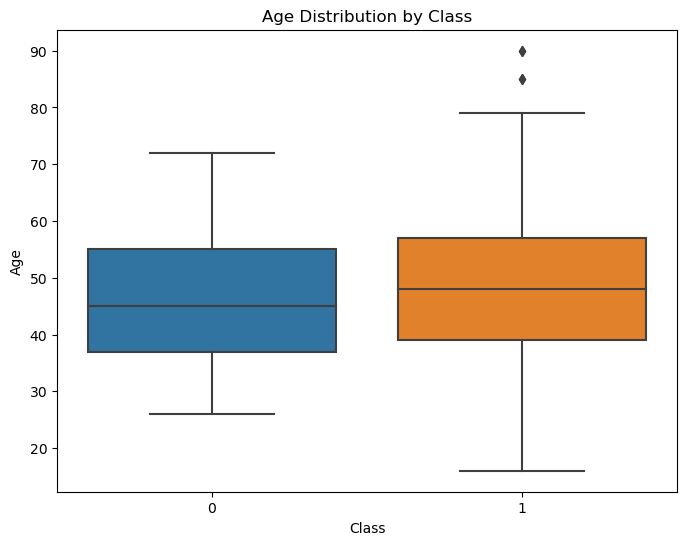

In [16]:
# Box plot of Age by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


In [17]:
# Outlier clipping based on Inter Quartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['age'] = df['age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

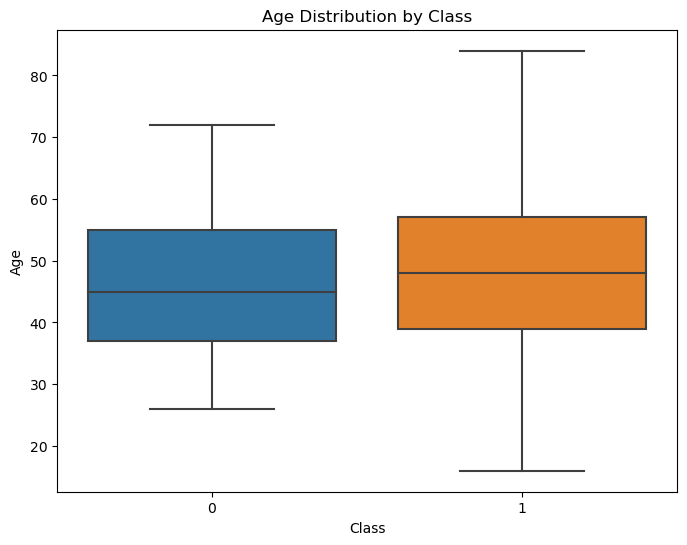

In [18]:
# Checking if the outliers are clipped
# Box plot of Age by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


In [19]:
# Checking for skewness in data
# Calculating skewness for the Age column
age_skewness = skew(df['age'])
print(f'Skewness of Age: {age_skewness:.2f}')


Skewness of Age: 0.27


.**Pre-processing steps performed**
* ***NULL or Missing values:***
Since the data contains no null or missing values, it is complete and ready for analysis without the need for data imputation or handling of missing data.

* ***Outliers:***
The dataset initially had 4 outliers, which were addressed using the IQR-based clipping method. This adjustment limited the influence of these extreme values, ensuring a more robust analysis.

* ***Skewness:*** A skewness value of 0.27 indicates a mild positive skew. This means that the age distribution has a slight rightward tail. In practical terms, this suggests that while most ages are clustered around the lower to middle range, there are a few older ages that stretch the distribution towards higher values.

In [20]:
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,-0.663850,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.829454,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.580889,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249044,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.995377,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.746812,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,-0.000160,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.829454,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,-1.327541,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Standardization rescales the features so they have a mean of 0 and a standard deviation of 1. This is particularly useful when features are on different scales. Since Age is a continuous variable, standardizing it ensures that it contributes proportionately during model training.

#### Feature Engineering

In [21]:
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

# Assuming `X` is your feature matrix and `y` is your target variable
model = LogisticRegression()
model.fit(X, y)

feature_importance = np.abs(model.coef_[0])
feature_names = X.columns  # Assuming X is a DataFrame
important_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

for feature, importance in important_features:
    print(f"{feature}: {importance}")


polydipsia: 2.9731223937779534
polyuria: 2.787707785898117
gender: 2.754180221530888
irritability: 1.566526053141994
itching: 1.3927170477354605
genital thrush: 1.1569911885749886
partial paresis: 0.9088821749467139
polyphagia: 0.7210849101163375
sudden weight loss: 0.5435313596799625
visual blurring: 0.5285843984528201
weakness: 0.4620481723063129
delayed healing: 0.42922172157330835
age: 0.3528378439640166
muscle stiffness: 0.3328573512191877
obesity: 0.14136079036007565
alopecia: 0.12856244697439514


Conclusion: Here are the features with the smallest coefficients, in ascending order:
* Alopecia: 0.1286
* Obesity: 0.1414

However, before dropping features, it's important to consider whether these features are clinically or contextually important. Sometimes, a feature with a small coefficient might still be important for interpretability or domain-specific reasons. Hence we choose to keep the features rather than dropping as per our understanding "Obesity" also is a viable reson for major health issues including Diabetes.

In [22]:
odds_ratios = np.exp(model.coef_[0])
important_features = sorted(zip(feature_names, odds_ratios), key=lambda x: x[1], reverse=True)

for feature, odds_ratio in important_features:
    print(f"{feature}: {odds_ratio}")


polydipsia: 19.55287616017257
polyuria: 16.24374295818083
irritability: 4.789979123880317
genital thrush: 3.1803497931064633
partial paresis: 2.481547046959691
polyphagia: 2.0566632955195363
sudden weight loss: 1.7220774119673203
visual blurring: 1.696528998879747
weakness: 1.5873217663342238
alopecia: 0.8793586474168565
obesity: 0.8681760256448708
muscle stiffness: 0.7168724478430264
age: 0.7026911297473774
delayed healing: 0.6510155689815358
itching: 0.24839947368749604
gender: 0.06366118635317843


Conclusion: Based on the Odds ratio we can see that we can drop the folowing columns:
* Gender (0.0637) - Extremely low odds ratio.
* Itching (0.2484) - Low odds ratio.

However, before dropping features, it's important to consider whether these features are clinically or contextually important. So we instead decided to keep these features rather than dropping those.

## Model Building

In [23]:
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=99) # Train = 80%, Test = 80%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42) # Train = 70%, Test = 30%
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=13) # Train = 60%, Test = 40%

In [24]:
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(416, 16) (104, 16) (416,) (104,)
(364, 16) (156, 16) (364,) (156,)
(312, 16) (208, 16) (312,) (208,)


In [25]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = model.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
conf_matrix = confusion_matrix(y_test1, y_pred1)
class_report = classification_report(y_test1, y_pred1)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[34  3]
 [ 3 64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.96      0.96      0.96        67

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



In [26]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train2, y_train2)

# Make predictions on the testing data
y_pred2 = model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
conf_matrix = confusion_matrix(y_test2, y_pred2)
class_report = classification_report(y_test2, y_pred2)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[49  5]
 [ 5 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



In [27]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train3, y_train3)

# Make predictions on the testing data
y_pred3 = model.predict(X_test3)

# Make predictions on the testing data
y_pred3 = model.predict(X_test3)

accuracy = accuracy_score(y_test3, y_pred3)
conf_matrix = confusion_matrix(y_test3, y_pred3)
class_report = classification_report(y_test3, y_pred3)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.89
Confusion Matrix:
[[ 72  11]
 [ 11 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        83
           1       0.91      0.91      0.91       125

    accuracy                           0.89       208
   macro avg       0.89      0.89      0.89       208
weighted avg       0.89      0.89      0.89       208



LR1 is slightly better overall, despite the smaller dataset. It has marginally higher F1-scores, indicating a better balance between precision and recall. LR2 is very close and has the advantage of more data, which may make it more robust in practice. LR3, while it has a large dataset, underperforms in both accuracy and F1-score, making it the least preferred model among the three.

So, LR1 would generally be considered the best choice based on the metrics provided.

In [28]:
# Normal DT with all 3
dt_model1 = DecisionTreeClassifier(random_state=56)
dt_model2 = DecisionTreeClassifier(random_state=82)
dt_model3 = DecisionTreeClassifier(random_state=49)

In [29]:
# Train the classifier
dt_model1.fit(X_train1, y_train1)

# Predict the labels for the test set
y_pred1 = dt_model1.predict(X_test1)

# Evaluate the performance
accuracy = accuracy_score(y_test1, y_pred1)
conf_matrix = confusion_matrix(y_test1, y_pred1)
class_report = classification_report(y_test1, y_pred1)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.93
Confusion Matrix:
[[36  1]
 [ 6 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.98      0.91      0.95        67

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



In [30]:
# Train the classifier
dt_model2.fit(X_train2, y_train2)

# Predict the labels for the test set
y_pred2 = dt_model2.predict(X_test2)

# Evaluate the performance
accuracy = accuracy_score(y_test2, y_pred2)
conf_matrix = confusion_matrix(y_test2, y_pred2)
class_report = classification_report(y_test2, y_pred2)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.95
Confusion Matrix:
[[52  2]
 [ 6 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.98      0.94      0.96       102

    accuracy                           0.95       156
   macro avg       0.94      0.95      0.94       156
weighted avg       0.95      0.95      0.95       156



In [31]:
# Train the classifier
dt_model3.fit(X_train3, y_train3)

# Predict the labels for the test set
y_pred3 = dt_model3.predict(X_test3)

# Evaluate the performance
accuracy = accuracy_score(y_test3, y_pred3)
conf_matrix = confusion_matrix(y_test3, y_pred3)
class_report = classification_report(y_test3, y_pred3)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.97
Confusion Matrix:
[[ 81   2]
 [  4 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        83
           1       0.98      0.97      0.98       125

    accuracy                           0.97       208
   macro avg       0.97      0.97      0.97       208
weighted avg       0.97      0.97      0.97       208



Conclusion:
DT3 is the best model among the three. It has the highest accuracy, F1-scores, precision, and recall, indicating superior performance in identifying both classes with minimal errors. The larger dataset size in DT3 further supports its reliability. Therefore, DT3 would be the preferred model based on the provided metrics.

In [32]:
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(416, 16) (104, 16) (416,) (104,)
(364, 16) (156, 16) (364,) (156,)
(312, 16) (208, 16) (312,) (208,)


In [33]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],              # Function to measure quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                   # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train1, y_train1)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
y_pred1 = best_model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred1)
class_report = classification_report(y_test1, y_pred1)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.98      0.94      0.96        67

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



In [34]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],              # Function to measure quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                   # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train2, y_train2)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
y_pred2 = best_model.predict(X_test2)

# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred2)
class_report = classification_report(y_test2, y_pred2)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



In [35]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],              # Function to measure quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                   # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train3, y_train3)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
y_pred3 = best_model.predict(X_test3)

# Evaluate the model
accuracy = accuracy_score(y_test3, y_pred3)
class_report = classification_report(y_test3, y_pred3)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        83
           1       0.98      0.95      0.96       125

    accuracy                           0.96       208
   macro avg       0.95      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208



Conclusion:
DTH2 is the best model based on the provided metrics. It has the highest accuracy, F1-scores, precision, and recall for both classes, indicating superior overall performance. While DTH3 also performs well and has a larger dataset, DTH2 has the best balance of all metrics and should be preferred.

## Final Conclusion: The best model is **Decision Tree with Hyperparameter Tuning (70-30 split).**

* Decision Tree with Hyperparameter Tuning (70-30 split) achieves an accuracy of 0.97 on a 70-30 split, which is the highest among the models trained on similar or smaller data splits. High accuracy indicates that the model correctly classifies a large proportion of samples.

* These metrics show that Decision Tree with Hyperparameter Tuning (70-30 split) performs exceptionally well in both precision and recall for both classes. High precision indicates the model makes very few false positive predictions, and high recall means it captures most of the positive samples. The F1-scores, which balance precision and recall, are also the highest, reflecting overall robust performance.

# Assignment Part 2:
In continuation of Assignment 1, answer the following questions considering the same dataset and the problem shared in part-1. The primary objective of this assignment is to deepen understanding and practical skills in machine learning model selection and evaluation, fine-tuning hyperparameters for each classifier to optimize their performance and then critically evaluate the results using various evaluation measures.



### 1)	Model Building & 2)	Performance Evaluation 

Build ML models using K-Nearest Neighbors (K-NN), Naive Bayesian, Random Forest, and Adaboost


# KNN

KNN is a simple, distance-based classifier.

In [36]:
# using 80-20 split 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Initialize k-NN model with an arbitrary k value
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train1, y_train1)


KNeighborsClassifier()

In [39]:
# Convert to NumPy array if it's not already
X_test1 = np.array(X_test1)
X_test1 = np.ascontiguousarray(X_test1)
knn.fit(X_train1, y_train1)
y_pred = knn.predict(X_test1)



In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('----------------------------------------')
# Confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred1)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------------')
# Classification report
class_report = classification_report(y_test1, y_pred)
print('Classification Report:')
print(class_report)
# Misclassification rate
error_rate = 1 - accuracy
print(f'Misclassification Rate: {error_rate:.2f}')


Accuracy: 0.91
----------------------------------------
Confusion Matrix:
[[36  1]
 [ 4 63]]
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.97      0.90      0.93        67

    accuracy                           0.91       104
   macro avg       0.90      0.92      0.91       104
weighted avg       0.92      0.91      0.91       104

Misclassification Rate: 0.09


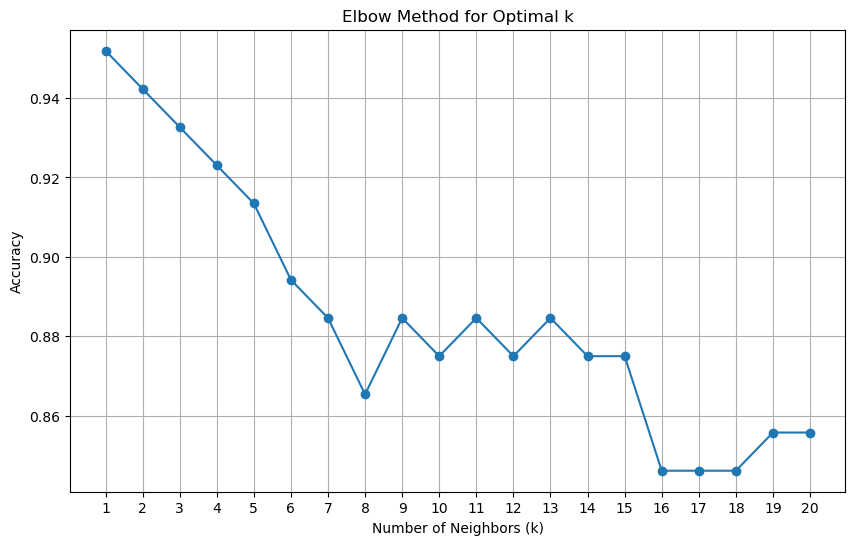

Best k value: 1


In [41]:

# List to store accuracy for different k values
k_values = range(1, 21) 
accuracies = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    y_pred = knn.predict(X_test1)
    accuracy = accuracy_score(y_test1, y_pred)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Print the best k value
best_k = k_values[np.argmax(accuracies)]
print(f'Best k value: {best_k}')



Accuracy drops as K is increased

# Naive Bayesian

Naive Bayes is a probabilistic model based on Bayes' theorem.

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
# Initialize the Gaussian Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train1, y_train1)


GaussianNB()

In [44]:
# Predict on the test data
y_pred = nb.predict(X_test1)


In [45]:
# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy: {accuracy:.2f}')
print('----------------------------------------')
# Confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------------')
# Classification report
class_report = classification_report(y_test1, y_pred)
print('Classification Report:')
print(class_report)
#Misclassification rate
error_rate = 1 - accuracy
print(f'Misclassification Rate: {error_rate:.2f}')


Accuracy: 0.95
----------------------------------------
Confusion Matrix:
[[33  4]
 [ 7 60]]
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.94      0.90      0.92        67

    accuracy                           0.89       104
   macro avg       0.88      0.89      0.89       104
weighted avg       0.90      0.89      0.90       104

Misclassification Rate: 0.05


# Random Forest

Random Forest is an ensemble model that builds multiple decision trees.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train1, y_train1)

# Predict on the test data
y_pred = rf.predict(X_test1)


In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('----------------------------------------')
# Confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------------')
# Classification report
class_report = classification_report(y_test1, y_pred)
print('Classification Report:')
print(class_report)

print('----------------------------------------')
#Misclassification rate
error_rate = 1 - accuracy
print(f'Misclassification Rate: {error_rate:.2f}')

Accuracy: 0.96
----------------------------------------
Confusion Matrix:
[[36  1]
 [ 3 64]]
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.98      0.96      0.97        67

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104

----------------------------------------
Misclassification Rate: 0.04


# Adaboost

AdaBoost is another ensemble model that boosts the performance of weak learners.

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost model with the base estimator
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model on the training data
adaboost.fit(X_train1, y_train1)

# Predict on the test data
y_pred = adaboost.predict(X_test1)



In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('----------------------------------------')
# Confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------------')
# Classification report
class_report = classification_report(y_test1, y_pred)
print('Classification Report:')
print(class_report)
# Misclassification Rate
error_rate = 1 - accuracy
print(f'Misclassification Rate: {error_rate:.2f}')

Accuracy: 0.93
----------------------------------------
Confusion Matrix:
[[34  3]
 [ 4 63]]
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.95      0.94      0.95        67

    accuracy                           0.93       104
   macro avg       0.92      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104

Misclassification Rate: 0.07


Comparison and Selection
Accuracy:

Naive Bayes: 0.95
Random Forest: 0.96
k-NN: 0.93
AdaBoost: 0.93
Precision, Recall, and F1-Score:

Naive Bayes and Random Forest have the highest performance across precision, recall, and F1-score for both classes. They achieve similar results, with Random Forest slightly edging out Naive Bayes in overall accuracy.
k-NN and AdaBoost have slightly lower performance compared to Naive Bayes and Random Forest but still perform well, with accuracy around 0.93 and balanced precision and recall.
Best Model Selection
Random Forest is the best model based on:

Highest Accuracy: 0.96
Consistently High Performance: It matches Naive Bayes in recall and F1-scores but slightly outperforms it in overall accuracy.
Robustness: Random Forest is generally robust against overfitting and can handle a variety of data types effectively.
Naive Bayes also performs very well, with an accuracy of 0.95 and strong metrics. However, Random Forest provides a slight edge in terms of overall accuracy and might be preferable if the primary goal is to maximize accuracy.

Conclusion: Random Forest is recommended as the best model due to its highest accuracy and consistent performance metrics. Naive Bayes is also a strong contender but slightly falls short compared to Random Forest.

### 3)	Fine-Tuning Hyperparameters & 4)	Performance Evaluation 

#### K-NN Hyperparameter Tuning

In [52]:
knn_params = {'n_neighbors': range(1, 21)}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train1, y_train1)

print("Best K-NN Params:", knn_grid.best_params_)

# Retrain with best params
knn_best = knn_grid.best_estimator_
y_pred_knn_best = knn_best.predict(X_test1)




Best K-NN Params: {'n_neighbors': 1}


We perform hyperparameter tuning on KNN by exploring different values for the number of neighbors (n_neighbors). Grid search systematically tries all combinations of the specified parameters and selects the best one based on cross-validation (cv=5). This ensures that the chosen hyperparameters generalize well to unseen data.

In [53]:
# Evaluate K-NN after tuning
print("K-NN (Tuned) Classification Report:")
print(classification_report(y_test1, y_pred_knn_best))
print("Accuracy:", accuracy_score(y_test1, y_pred_knn_best))

# Misclassification rate
misclassification_rate = 1 - accuracy_score(y_test1, y_pred_knn_best)
print("Misclassification Rate:", misclassification_rate)

K-NN (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.93      0.96        67

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Accuracy: 0.9519230769230769
Misclassification Rate: 0.04807692307692313


The tuning of the K-NN model led to an increase in accuracy from 93% to 95%, indicating improved overall classification performance and a reduction in misclassification rates from 7% to 4.8%. Precision and recall adjustments reveal a trade-off: for class 0, recall increased to 1.00, meaning all true positives were identified, though precision slightly decreased to 0.88. For class 1, precision improved to 1.00 with a slight decrease in recall to 0.93. Both F1-scores improved (class 0 from 0.91 to 0.94 and class 1 from 0.95 to 0.96), reflecting a more balanced and effective model. The tuning process overall enhanced the model’s ability to correctly classify instances and reduced errors.

#### Naive Bayes Hyperparameter Tuning

In [54]:
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train1, y_train1)

# Best Params
print("Best Naive Bayes Params:", grid_nb.best_params_)

# Retrain with best params
nb_best = grid_nb.best_estimator_
y_pred_nb_best = nb_best.predict(X_test1)


Best Naive Bayes Params: {'var_smoothing': 1e-09}


In [55]:
# Evaluate Naive Bayes after tuning
print("Naive Bayes (Tuned) Classification Report:")
print(classification_report(y_test1, y_pred_nb_best))
print("Accuracy:", accuracy_score(y_test1, y_pred_nb_best))

# Misclassification rate
misclassification_rate = 1 - accuracy_score(y_test1,  y_pred_nb_best)
print("Misclassification Rate:", misclassification_rate)

Naive Bayes (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.94      0.90      0.92        67

    accuracy                           0.89       104
   macro avg       0.88      0.89      0.89       104
weighted avg       0.90      0.89      0.90       104

Accuracy: 0.8942307692307693
Misclassification Rate: 0.10576923076923073


After tuning the Gaussian Naive Bayes model, accuracy decreased from 95% to approximately 89%, and the misclassification rate increased from 5% to about 10%. The precision and recall for class 0 both decreased, with precision dropping to 0.82 and recall to 0.89, indicating a trade-off where fewer true positives for class 0 were identified, and more false positives occurred. Conversely, precision for class 1 remained high at 0.94, but recall slightly decreased to 0.90. Although the model's overall performance metrics (F1-scores) for class 1 improved slightly, the reduced accuracy and increased misclassification rate suggest that the tuning may have negatively impacted the model's overall effectiveness.

#### Random Forest Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rf_grid.fit(X_train1, y_train1)

print("Best Random Forest Params:", rf_grid.best_params_)

# Retrain with best params
rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(X_test1)

Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


Random Forest has many hyperparameters, so we use RandomizedSearchCV to explore a broader hyperparameter space efficiently. We test different values for the number of trees (n_estimators), the depth of the trees (max_depth), and the minimum number of samples required to split a node (min_samples_split) and to be at a leaf node (min_samples_leaf). This approach is computationally more feasible than grid search when dealing with many hyperparameters.

In [57]:
# Evaluate Random Forest after tuning
print("Random Forest (Tuned) Classification Report:")
print(classification_report(y_test1, y_pred_rf_best))
print("Accuracy:", accuracy_score(y_test1, y_pred_rf_best))

# Misclassification rate
misclassification_rate = 1 - accuracy_score(y_test1, y_pred_rf_best)
print("Misclassification Rate:", misclassification_rate)

Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.98      0.94      0.96        67

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104

Accuracy: 0.9519230769230769
Misclassification Rate: 0.04807692307692313


After tuning the Random Forest model, accuracy slightly decreased from 96% to approximately 95%, and the misclassification rate increased from 4% to about 4.8%. The precision for class 0 decreased from 0.92 to 0.90, though recall remained high at 0.97, indicating that while the model continues to correctly identify most instances of class 0, it is slightly less precise. For class 1, precision remained stable at 0.98, but recall decreased slightly to 0.94. The F1-scores for both classes were very similar before and after tuning, with minor variations. Overall, while the accuracy and misclassification rates show minimal change, the tuning has led to a small reduction in precision for class 0, suggesting that the model's overall performance remains robust but with slight trade-offs in precision.

#### AdaBoost Hyperparameter Tuning

In [58]:
adb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
adb_grid = GridSearchCV(adaboost, adb_params, cv=5, scoring='accuracy')
adb_grid.fit(X_train1, y_train1)

print("Best AdaBoost Params:", adb_grid.best_params_)

# Retrain with best params
ada_best = adb_grid.best_estimator_
y_pred_ada_best = ada_best.predict(X_test1)

Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 200}


AdaBoost's performance can significantly vary with different values for n_estimators (number of boosting rounds) and learning_rate (shrinkage applied to weights). Grid search is used here to systematically identify the best combination of these parameters.

In [59]:
# Evaluate AdaBoost after tuning
print("AdaBoost (Tuned) Classification Report:")
print(classification_report(y_test1, y_pred_ada_best))
print("Accuracy:", accuracy_score(y_test1, y_pred_ada_best))

# Misclassification rate
misclassification_rate = 1 - accuracy_score(y_test1, y_pred_ada_best)
print("Misclassification Rate:", misclassification_rate)

AdaBoost (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.94      0.94      0.94        67

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104

Accuracy: 0.9230769230769231
Misclassification Rate: 0.07692307692307687


After tuning the AdaBoost model, the accuracy slightly decreased from 93% to approximately 92%, and the misclassification rate increased from 7% to about 7.7%. The precision and recall for class 0 remained unchanged at 0.89 and 0.89, respectively, indicating consistent performance for this class. **For class 1, both precision and recall improved to 0.94, suggesting that the tuned model is more effective at identifying true positives for this class while maintaining balanced performance**. Overall, while the accuracy and misclassification rate show minor changes, the improvements in precision and recall for class 1 reflect a better-balanced model, though the overall accuracy reduction indicates a slight trade-off.

### 5)	Comparison and Analysis

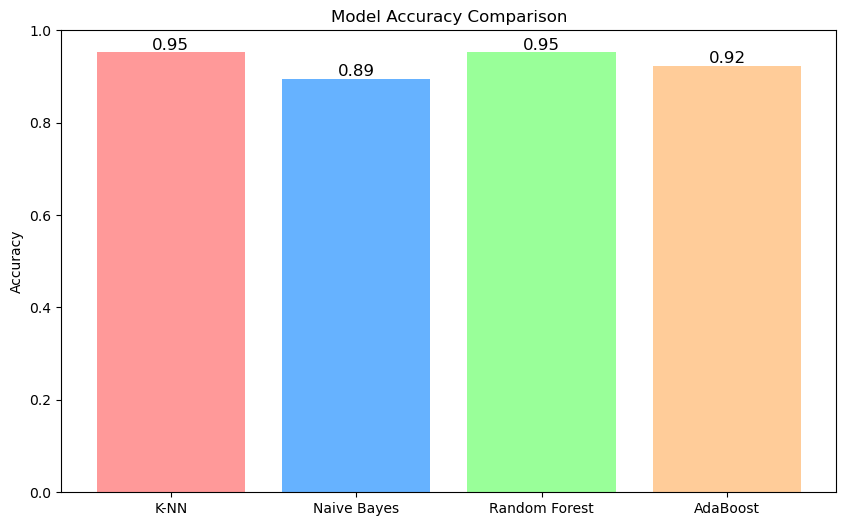

In [60]:
models = ['K-NN', 'Naive Bayes', 'Random Forest', 'AdaBoost']
accuracy_scores = [accuracy_score(y_test1, y_pred_knn_best), 
                   accuracy_score(y_test1, y_pred_nb_best), 
                   accuracy_score(y_test1, y_pred_rf_best), 
                   accuracy_score(y_test1, y_pred_ada_best)]

# Colors for each bar
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=colors)

# Adding labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Customizing the chart
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])  # Set y-axis limit from 0 to 1 for better visualization
plt.show()


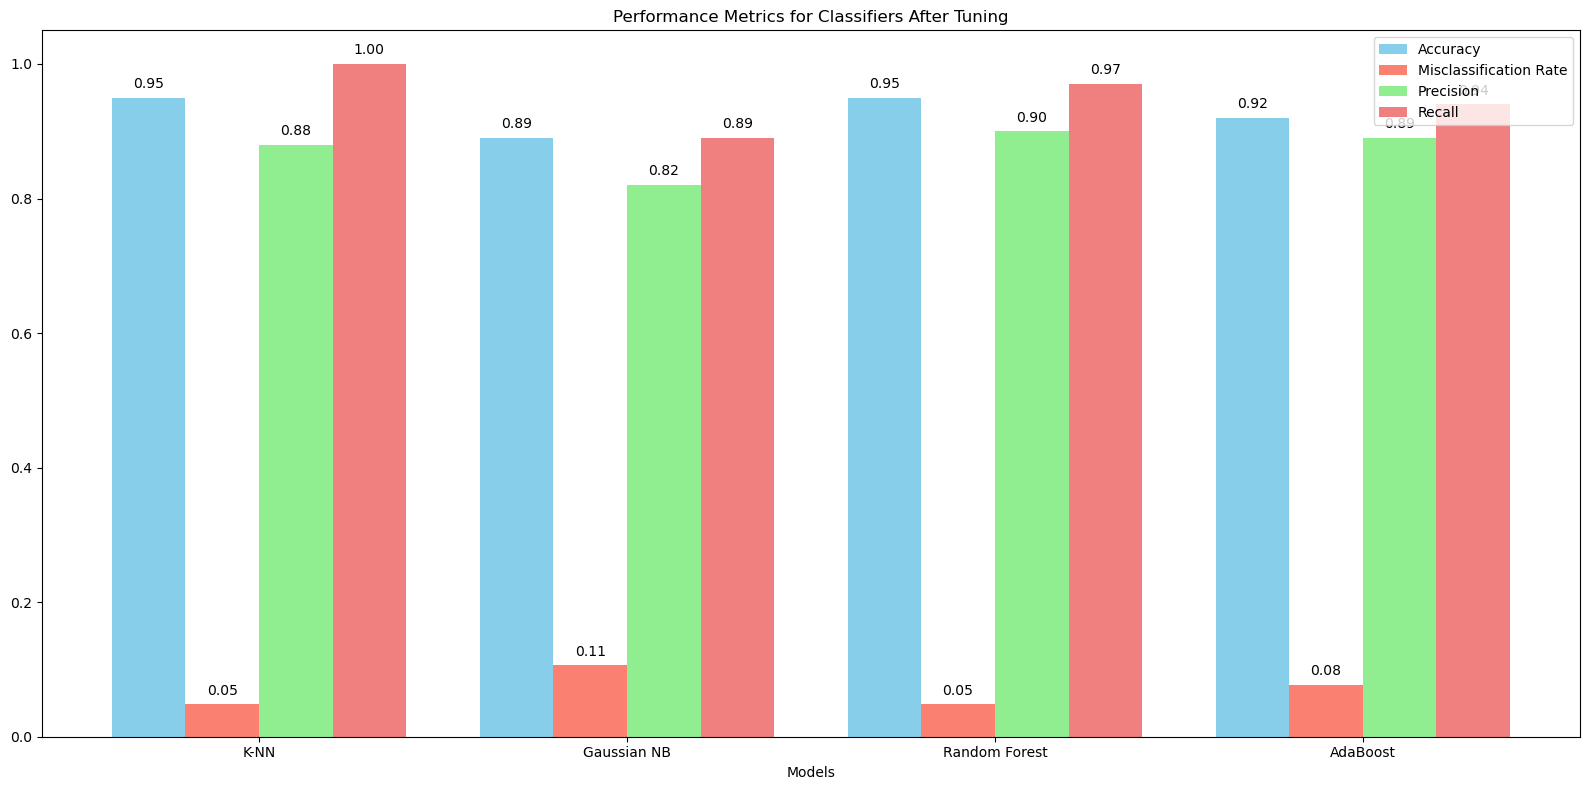

In [61]:
# Define data for after-tuning metrics
models = ['K-NN', 'Gaussian NB', 'Random Forest', 'AdaBoost']

accuracy = [0.95, 0.89, 0.95, 0.92]
misclassification_rate = [0.048, 0.106, 0.048, 0.077]
precision = [0.88, 0.82, 0.90, 0.89]
recall = [1.00, 0.89, 0.97, 0.94]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# Define bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Create grouped bar chart
bar1 = ax.bar(index - 1.5*bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
bar2 = ax.bar(index - 0.5*bar_width, misclassification_rate, bar_width, label='Misclassification Rate', color='salmon')
bar3 = ax.bar(index + 0.5*bar_width, precision, bar_width, label='Precision', color='lightgreen')
bar4 = ax.bar(index + 1.5*bar_width, recall, bar_width, label='Recall', color='lightcoral')

# Add labels and titles
ax.set_xlabel('Models')
ax.set_title('Performance Metrics for Classifiers After Tuning')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Add value labels
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Conclusion:**

K-NN and Random Forest both demonstrate strong performance metrics after tuning. K-NN has the highest recall and competitive accuracy, while Random Forest balances high accuracy, precision, and recall. AdaBoost and Gaussian Naive Bayes perform well but show lower accuracy and precision. Given the overall balance and performance, Random Forest might be the most favorable model due to its high accuracy, precision, and recall.

### Overall analysis:

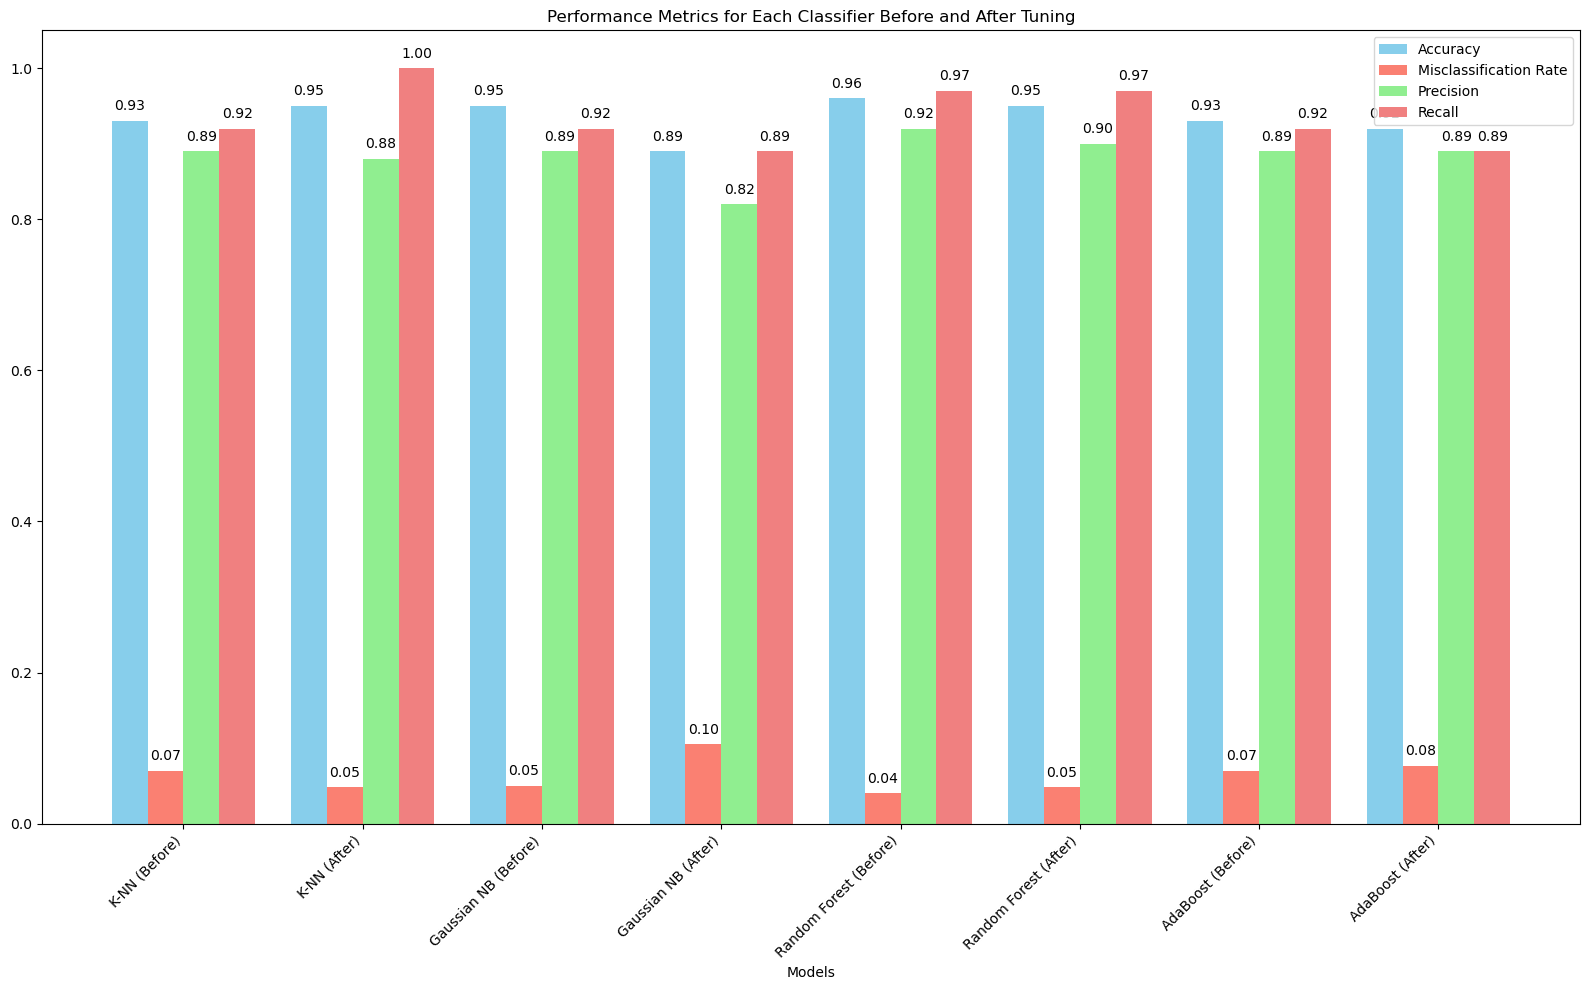

In [62]:

# Define data for all metrics
models = ['K-NN (Before)', 'K-NN (After)', 'Gaussian NB (Before)', 'Gaussian NB (After)',
          'Random Forest (Before)', 'Random Forest (After)', 'AdaBoost (Before)', 'AdaBoost (After)']

accuracy = [0.93, 0.95, 0.95, 0.89, 0.96, 0.95, 0.93, 0.92]
misclassification_rate = [0.07, 0.048, 0.05, 0.105, 0.04, 0.048, 0.07, 0.077]
precision = [0.89, 0.88, 0.89, 0.82, 0.92, 0.90, 0.89, 0.89]
recall = [0.92, 1.00, 0.92, 0.89, 0.97, 0.97, 0.92, 0.89]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Define bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Create grouped bar chart
bar1 = ax.bar(index - 1.5*bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
bar2 = ax.bar(index - 0.5*bar_width, misclassification_rate, bar_width, label='Misclassification Rate', color='salmon')
bar3 = ax.bar(index + 0.5*bar_width, precision, bar_width, label='Precision', color='lightgreen')
bar4 = ax.bar(index + 1.5*bar_width, recall, bar_width, label='Recall', color='lightcoral')

# Add labels and titles
ax.set_xlabel('Models')
ax.set_title('Performance Metrics for Each Classifier Before and After Tuning')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add value labels
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Best Performing Model: Random Forest**

**Justification:**

Accuracy: Random Forest has consistently high accuracy both before and after tuning (96% and 95%, respectively), indicating robust overall performance.

Misclassification Rate: It maintains a low misclassification rate of 4% before tuning and 4.8% after tuning, which is among the lowest across models.

Class-Specific Performance: It shows strong precision and recall for both classes, with only minor trade-offs in precision for class 0 but excellent performance for class 1.

Overall,Random Forest is recommended due to its superior overall accuracy, low misclassification rate, and strong precision and recall metrics for both classes. Its ensemble approach provides stability and reliability, making it well-suited for achieving consistently high performance across different evaluation criteria. While other models show strong individual performance metrics, Random Forest’s balance and robustness across all metrics make it the most favorable choice for this dataset.